In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
vehicle=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
vehicle

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
vehicle.shape

(4340, 8)

In [5]:
vehicle.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [6]:
vehicle.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
vehicle.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
vehicle.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
vehicle.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
vehicle.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool

In [11]:
vehicle['name'].value_counts()

Maruti Swift Dzire VDI                          69
Maruti Alto 800 LXI                             59
Maruti Alto LXi                                 47
Hyundai EON Era Plus                            35
Maruti Alto LX                                  35
                                                ..
Toyota Etios Liva VX                             1
Honda Jazz V                                     1
Ford Figo Petrol EXI                             1
Renault Duster 110PS Diesel RxZ Plus             1
Volkswagen Vento Celeste 1.5 TDI Highline AT     1
Name: name, Length: 1491, dtype: int64

In [12]:
vehicle.selling_price.min()

20000

In [13]:
vehicle.km_driven.max()

806599

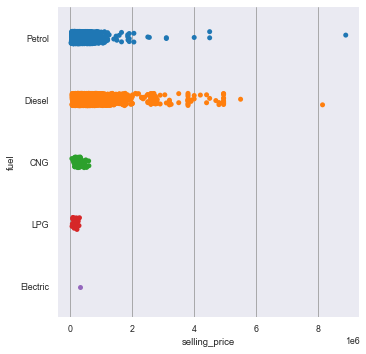

In [14]:
plt.figure
sns.set_style("darkgrid", {"grid.color": ".6"})
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 6})
sns.catplot(y = "fuel",x = "selling_price",data=vehicle)
plt.show()

In [15]:
top=vehicle['name'].value_counts()[:10]

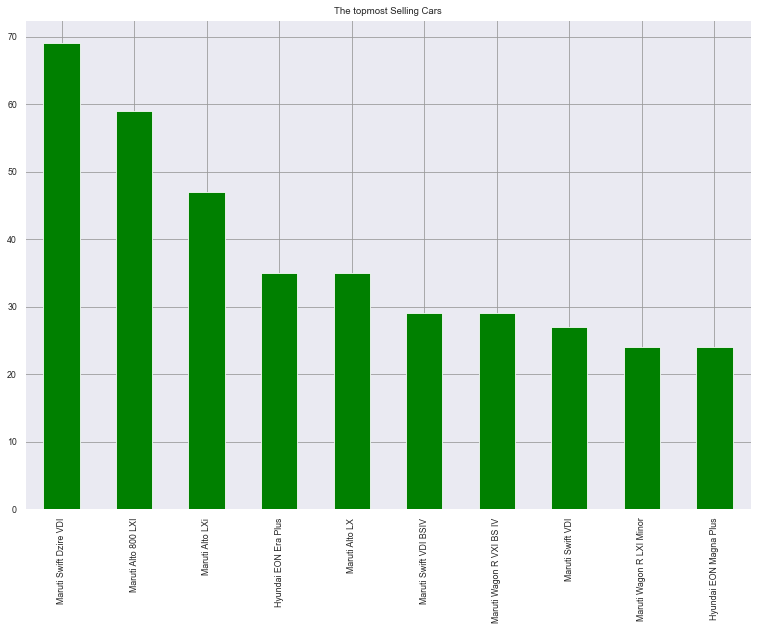

In [16]:
top.plot(kind='bar',figsize=(13,9),color='g',title="The topmost Selling Cars")
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='km_driven'>

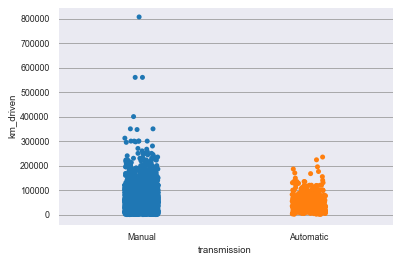

In [17]:
sns.stripplot(vehicle['transmission'],vehicle['km_driven'],jitter=True)

<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>

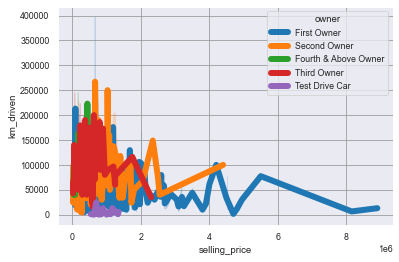

In [18]:
sns.lineplot(x='selling_price',y='km_driven',hue='owner',data=vehicle)

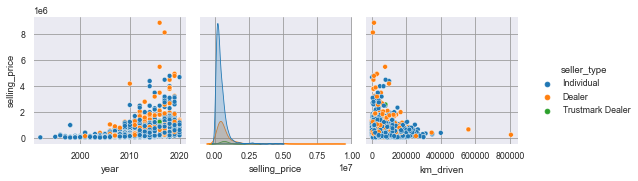

In [19]:
sns.pairplot(vehicle,hue='seller_type',y_vars=['selling_price'])

<AxesSubplot:>

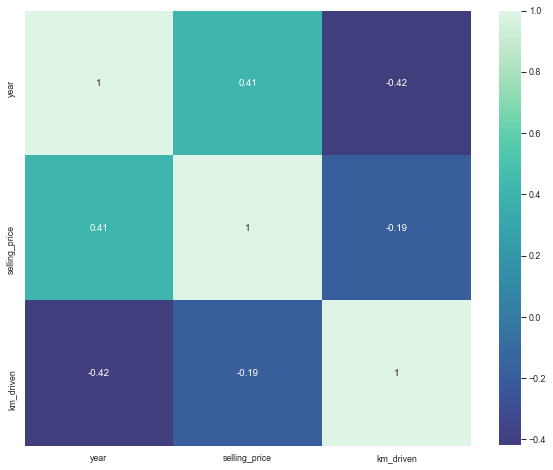

In [20]:
cor=vehicle.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=cor,annot=True,cmap='mako',center=0)

# Graphs discussed in the class

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# regplot

<AxesSubplot:xlabel='year', ylabel='selling_price'>

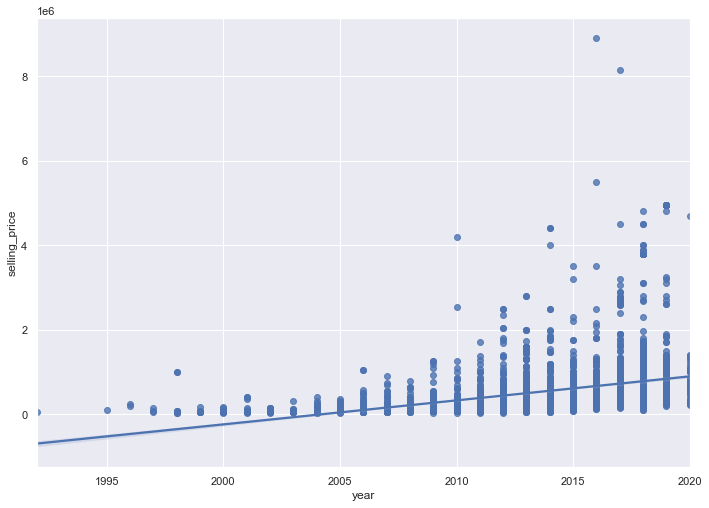

In [22]:
sns.regplot(x="year", y="selling_price", data = vehicle)

In [23]:
x = vehicle.selling_price
y = vehicle.year
model = LinearRegression()
model.fit(np.array(x).reshape(-1,1),y)
LinearRegression

sklearn.linear_model._base.LinearRegression

In [24]:
model.intercept_

2011.5704057951436

In [25]:
model.coef_

array([3.01586044e-06])

In [26]:
model.score(np.array(x).reshape(-1,1),y)

0.1713311570174395

# relational plot

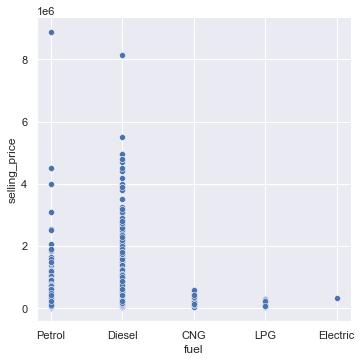

In [27]:
sns.relplot(x = "fuel", y = "selling_price", data = vehicle)

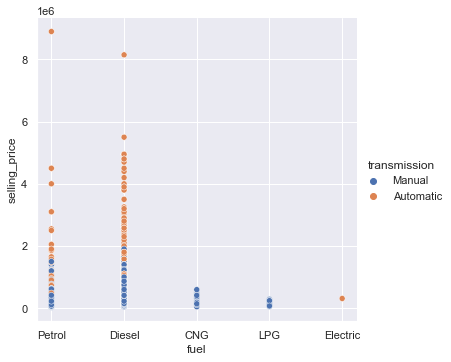

In [28]:
sns.relplot(x = "fuel", y = "selling_price",hue="transmission",data = vehicle)

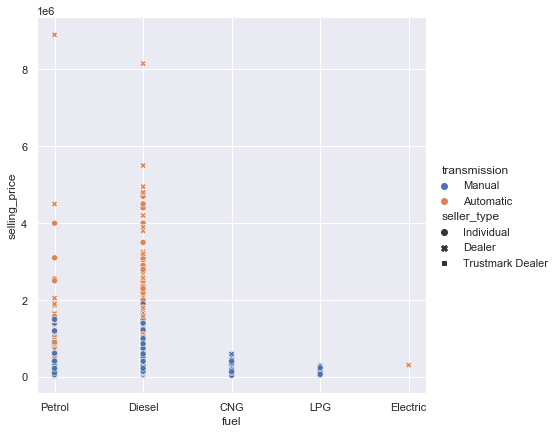

In [29]:
sns.relplot(x = "fuel",
            y = "selling_price",
            hue = "transmission",
            style = "seller_type",
            height = 6,
            data = vehicle);

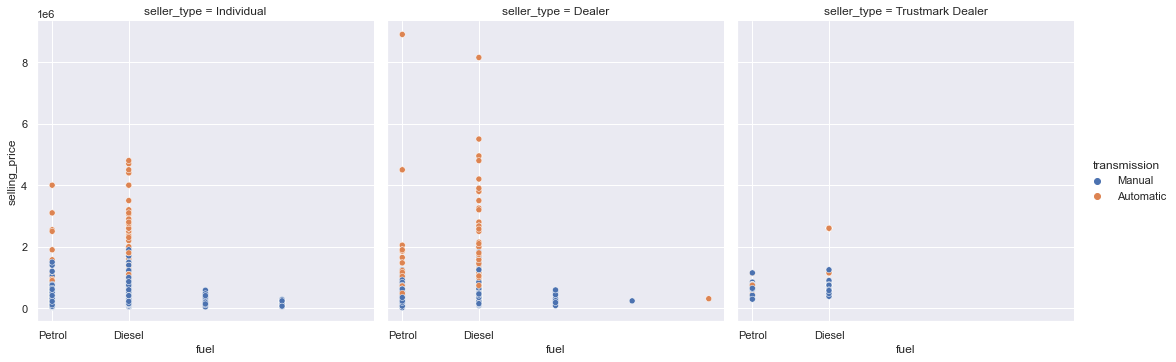

In [30]:
sns.relplot(x = "fuel", y = "selling_price", hue = "transmission", col = "seller_type", data = vehicle)

In [31]:
vehicle.groupby('seller_type')['selling_price'].mean()

seller_type
Dealer              721822.890342
Individual          424505.419236
Trustmark Dealer    914950.980392
Name: selling_price, dtype: float64

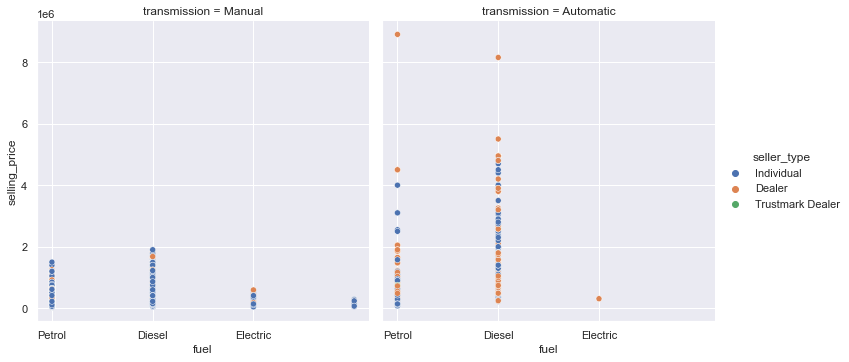

In [32]:
sns.relplot(x = "fuel", y = "selling_price", hue = "seller_type", col = "transmission", data = vehicle)

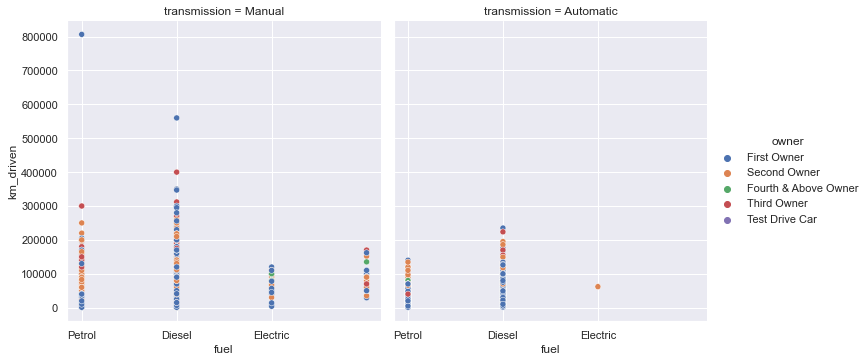

In [33]:
sns.relplot(x = "fuel", y = "km_driven", hue = "owner", col ="transmission" , data = vehicle)

# Sactterplots

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

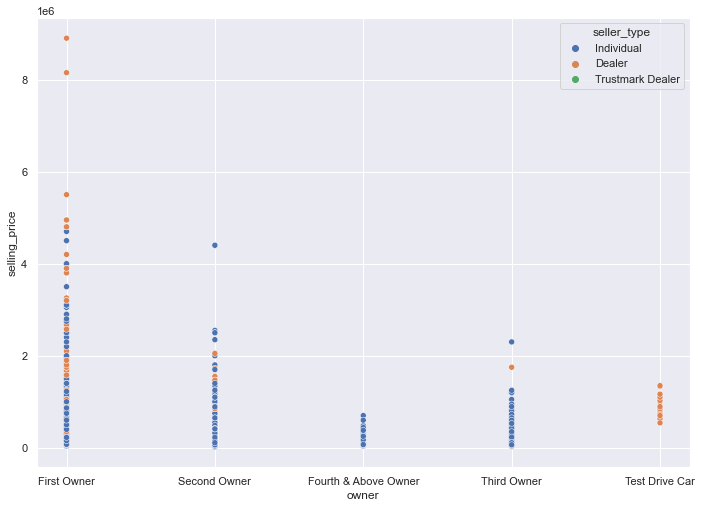

In [34]:
sns.scatterplot(x = "owner", y = "selling_price", hue= "seller_type", data =vehicle)

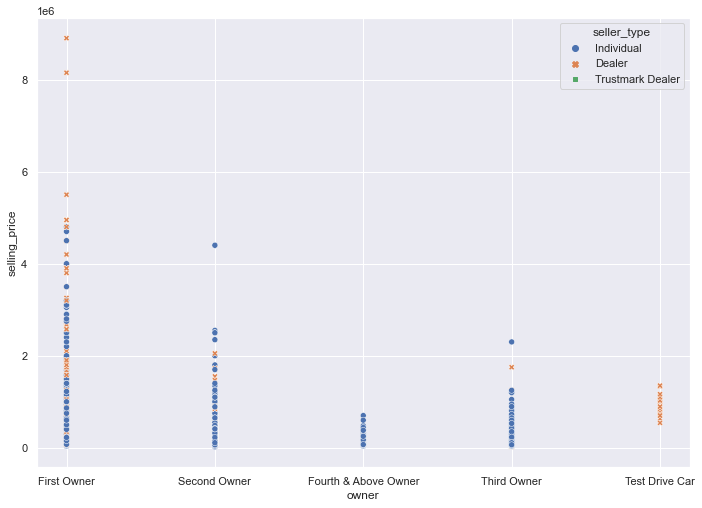

In [35]:
sns.scatterplot(x = "owner", y = "selling_price", hue= "seller_type", style="seller_type",data =vehicle);

# Categorical plots

[None, None, None, None, None, None, None, None, None, None]

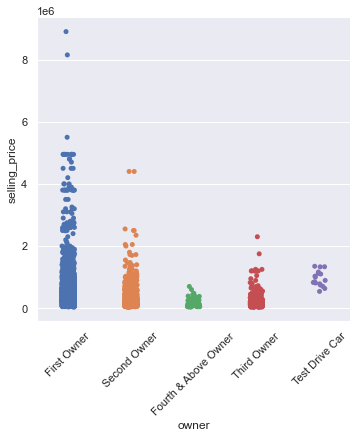

In [36]:
sns.catplot(x = "owner", y = "selling_price", data = vehicle)
locs,labels=plt.xticks()
plt.setp(labels,rotation=45)

[None, None, None, None, None, None, None, None, None, None]

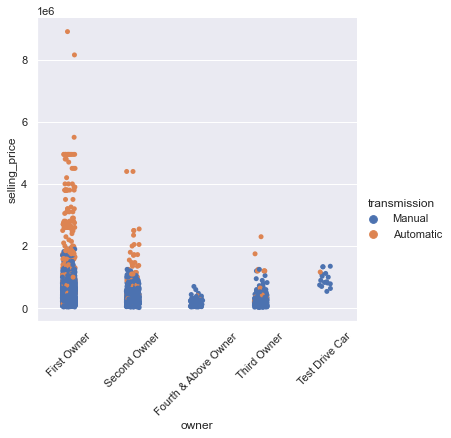

In [37]:
sns.catplot(x = "owner", y = "selling_price",hue="transmission", data = vehicle)
locs,labels=plt.xticks()
plt.setp(labels,rotation=45)

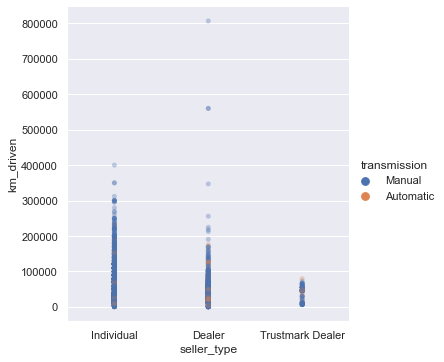

In [38]:
sns.catplot(x = "seller_type", y = "km_driven", jitter = False, hue = "transmission", alpha = .33, data = vehicle);

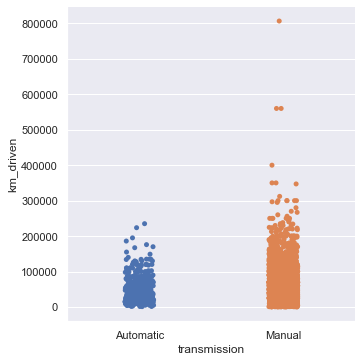

In [39]:
sns.catplot(x = "transmission", y = "km_driven", order = ["Automatic", "Manual"], data = vehicle)

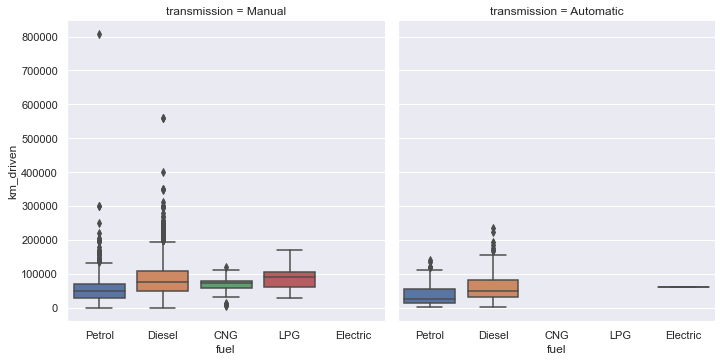

In [40]:
sns.catplot(x = "fuel", y = "km_driven", col = "transmission", kind="box", data =vehicle)

# Bee Swarm plot

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

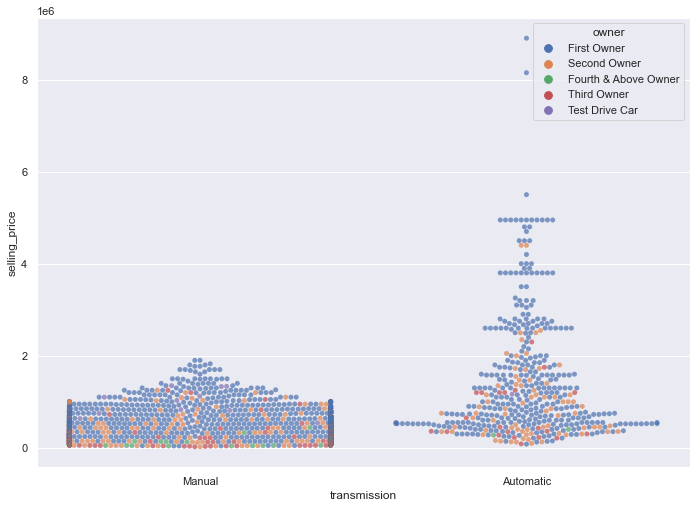

In [41]:
sns.swarmplot(x ="transmission", y = "selling_price", hue = "owner", alpha =.7, data = vehicle)

# Boxplot

<AxesSubplot:xlabel='fuel', ylabel='km_driven'>

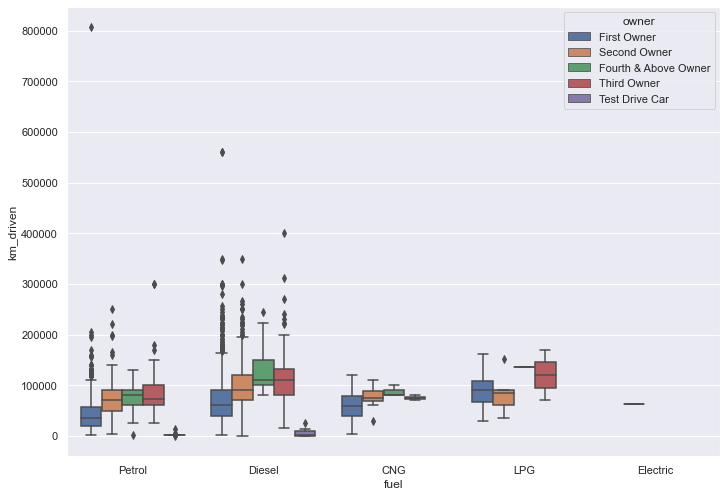

In [42]:
sns.boxplot(x = "fuel", y = "km_driven", hue = "owner", data = vehicle)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

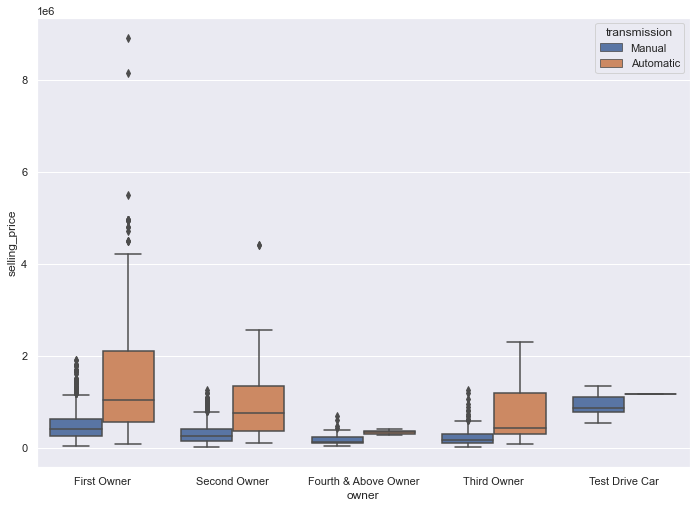

In [43]:
sns.boxplot(x = "owner", y = "selling_price", hue = "transmission", data = vehicle)

# Boxen Plot

<AxesSubplot:xlabel='fuel', ylabel='km_driven'>

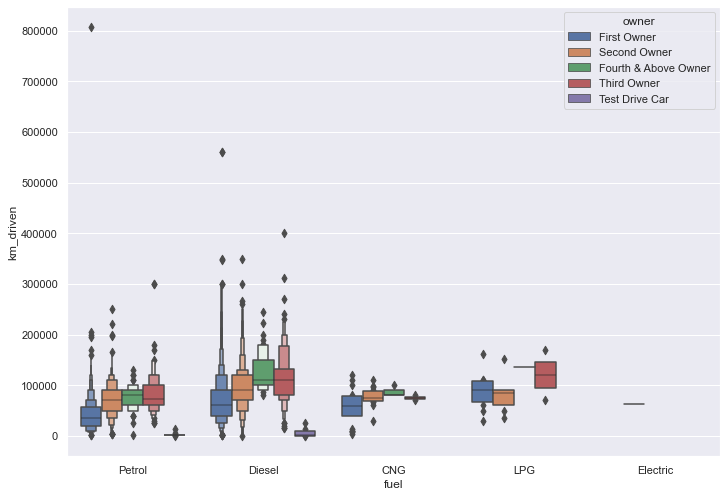

In [44]:
sns.boxenplot(x = "fuel", y = "km_driven", hue = "owner", data = vehicle)

# Fancy Box Plot

<AxesSubplot:xlabel='owner', ylabel='km_driven'>

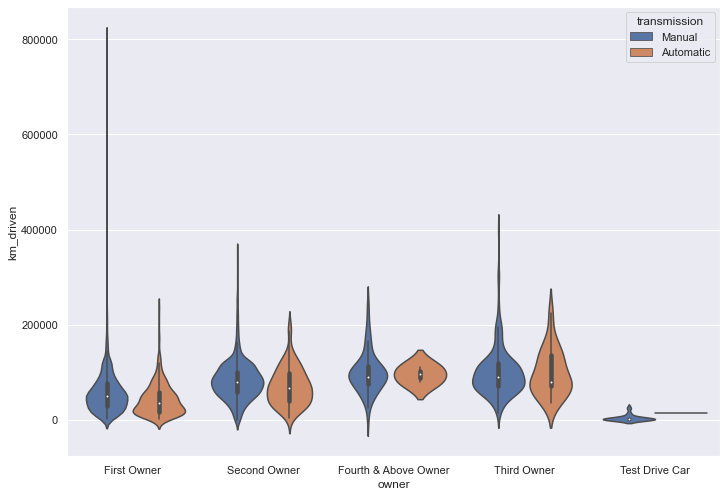

In [45]:
sns.violinplot(x ="owner", y = "km_driven", hue = "transmission", data = vehicle)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

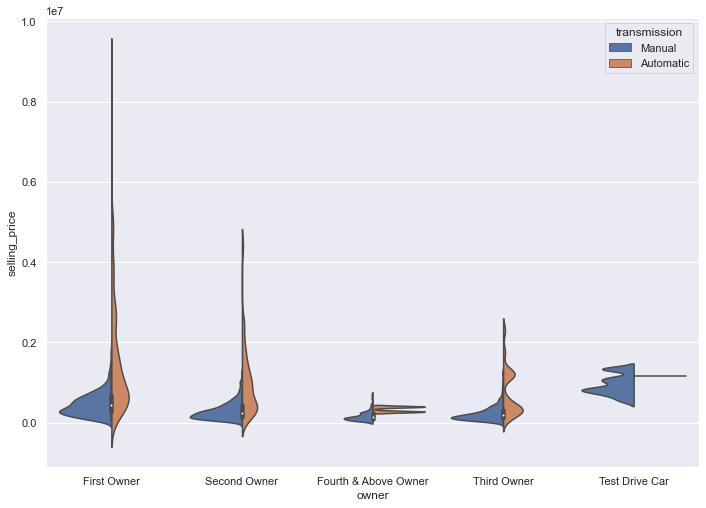

In [46]:
sns.violinplot(x ="owner", y = "selling_price", hue = "transmission", bw = .25, split = True, data = vehicle)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

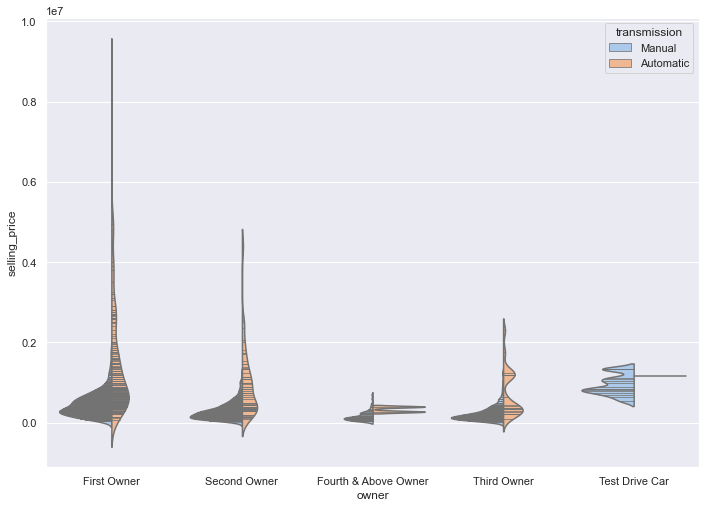

In [47]:
sns.violinplot(x ="owner", y = "selling_price", hue = "transmission", bw = .25, split = True,palette= "pastel", inner= "stick", data = vehicle)

<AxesSubplot:xlabel='owner', ylabel='km_driven'>

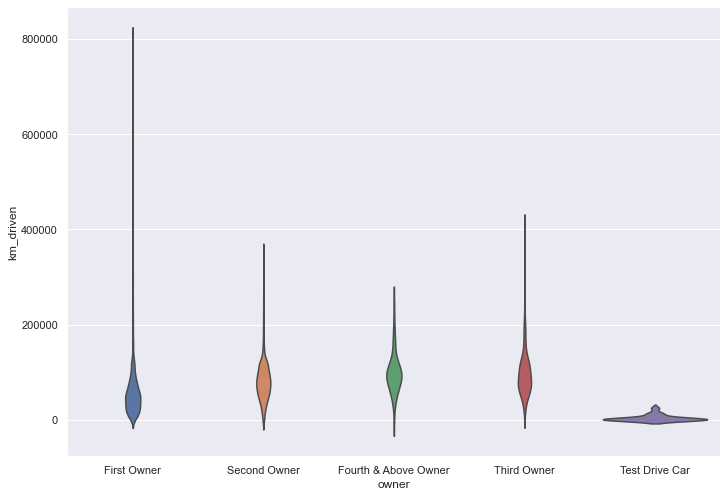

In [48]:
sns.violinplot(x ="owner", y = "km_driven",inner=None, data = vehicle)

overlap two kinds of plots

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


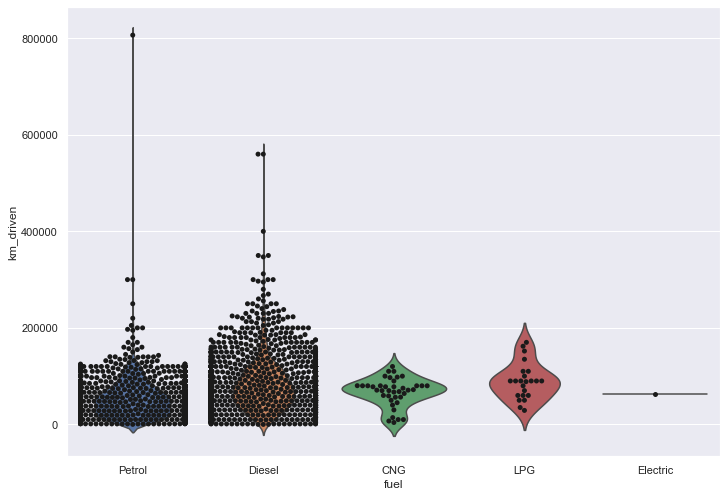

In [49]:
sns.violinplot(x = "fuel", y = "km_driven", inner = None, data = vehicle)
sns.swarmplot(x = "fuel", y = "km_driven", color = "k", size = 5, data = vehicle);

# Barplot

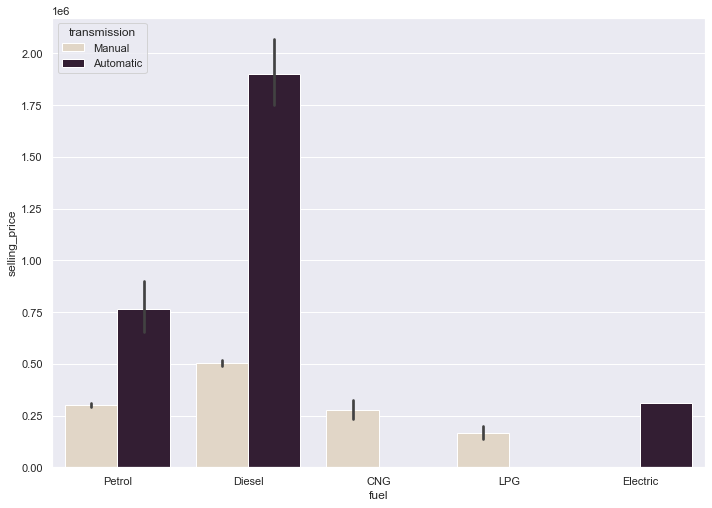

In [50]:
sns.barplot(x = "fuel", y= "selling_price", hue = "transmission", palette = "ch:.25", data = vehicle);

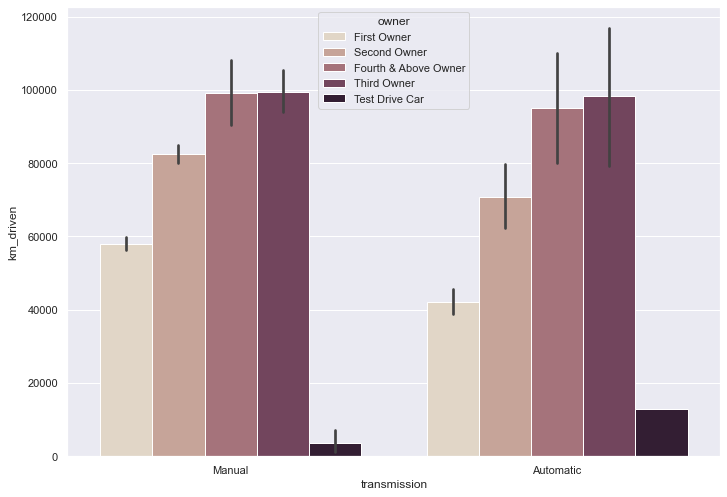

In [51]:
sns.barplot(x = "transmission", y= "km_driven", hue = "owner", palette = "ch:.25", data = vehicle);

Bars by categories

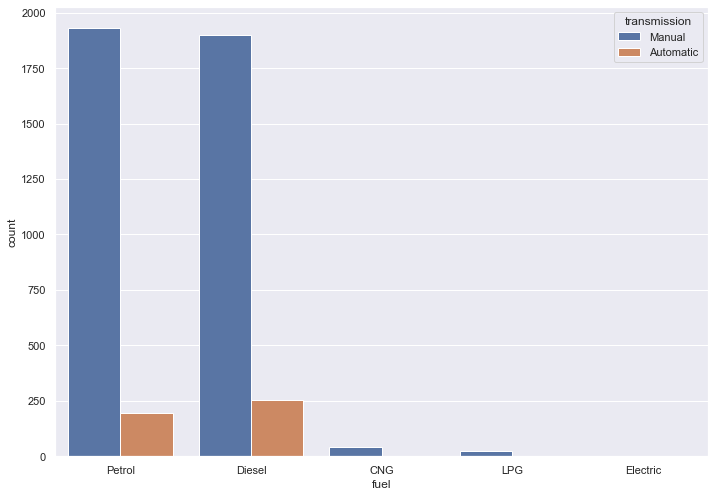

In [52]:
sns.countplot(x = "fuel", hue ="transmission", data = vehicle);

<AxesSubplot:xlabel='owner', ylabel='count'>

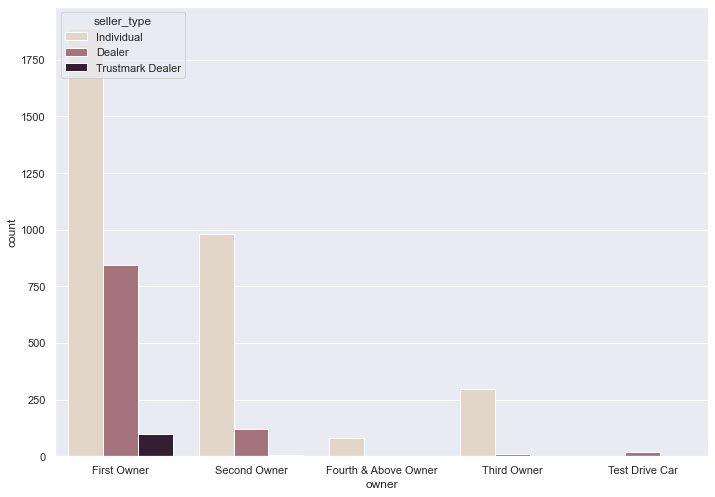

In [53]:
sns.countplot(x = "owner", hue = "seller_type", palette = "ch:.25", data = vehicle)

# point plots

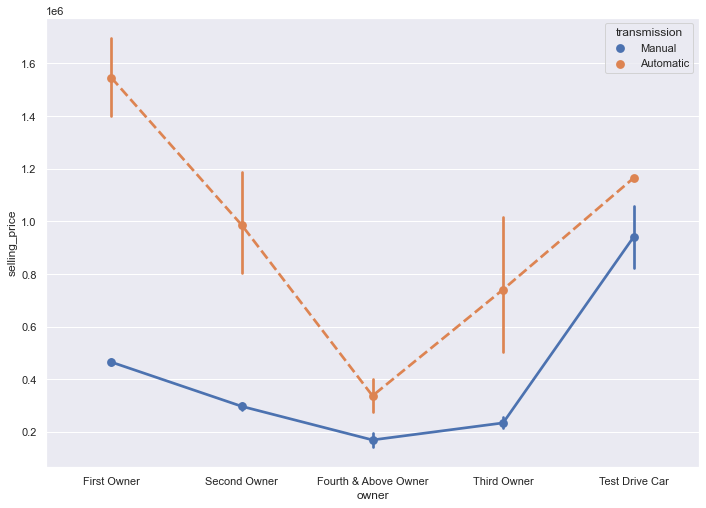

In [54]:
sns.pointplot(x = "owner", y = "selling_price", hue = "transmission", linestyles = ["-", "--"], data= vehicle);

<AxesSubplot:xlabel='fuel', ylabel='km_driven'>

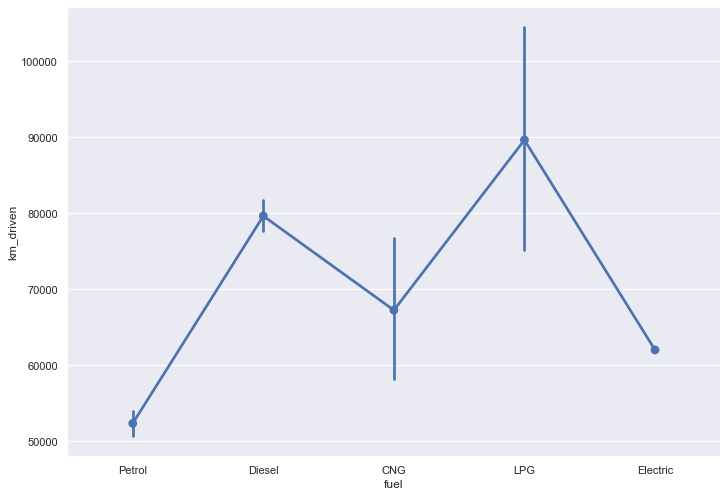

In [55]:
sns.pointplot(x = "fuel", y = "km_driven", data= vehicle)

# Simple linear regression

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
sns.set(style="darkgrid")

In [103]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='year', ylabel='selling_price'>

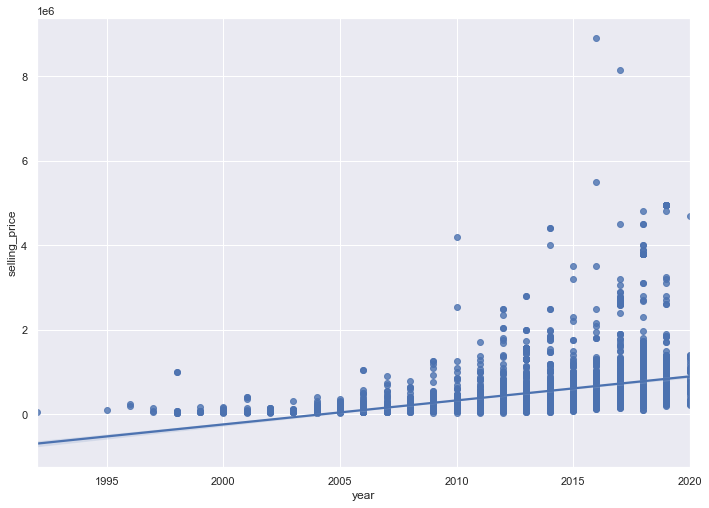

In [104]:
sns.regplot(x="year", y="selling_price", data = vehicle)

# one hot encoding method

In [105]:
vehicle["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [107]:
ohe=OneHotEncoder()
print(ohe)

OneHotEncoder()


In [112]:
v1=ohe.fit_transform(vehicle[["owner"]]).toarray()

In [115]:
ohe.categories_

[array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object)]

In [116]:
labels=ohe.categories_

In [117]:
np.array(labels).ravel()

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [ ]:
labels=np.array(labels).ravel()

In [118]:
print(labels)

[array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)]


In [120]:
pd.DataFrame(v1,columns=labels)

,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
4335,0.0,0.0,1.0,0.0,0.0
4336,0.0,0.0,1.0,0.0,0.0
4337,0.0,0.0,1.0,0.0,0.0
4338,1.0,0.0,0.0,0.0,0.0


In [121]:
features=pd.DataFrame(v1,columns=labels)
features

,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
4335,0.0,0.0,1.0,0.0,0.0
4336,0.0,0.0,1.0,0.0,0.0
4337,0.0,0.0,1.0,0.0,0.0
4338,1.0,0.0,0.0,0.0,0.0


In [124]:
veh1=pd.concat([vehicle,features],axis=1)
veh1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,"(First Owner,)","(Fourth & Above Owner,)","(Second Owner,)","(Test Drive Car,)","(Third Owner,)"
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,1.0,0.0,0.0,0.0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1.0,0.0,0.0,0.0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1.0,0.0,0.0,0.0,0.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,1.0,0.0,0.0,0.0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,0.0,0.0,1.0,0.0,0.0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,0.0,0.0,1.0,0.0,0.0
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,0.0,0.0,1.0,0.0,0.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,1.0,0.0,0.0,0.0,0.0


# Dummy variables for category

In [146]:
vehicle1=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
vehicle1['transmission']=vehicle1.transmission.map({'Manual':1,'Automatic':0})

In [147]:
pd.get_dummies(vehicle1.owner)

,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
4335,0,0,1,0,0
4336,0,0,1,0,0
4337,0,0,1,0,0
4338,1,0,0,0,0


In [148]:
vehicle1.sample(10)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
289,Mahindra XUV500 W11 Option AWD,2020,1400000,25000,Diesel,Dealer,1,First Owner
1005,Hyundai Verna CRDi 1.6 SX,2017,900000,50000,Diesel,Individual,1,First Owner
87,Honda Brio S MT,2015,371000,20000,Petrol,Dealer,1,First Owner
2463,Toyota Innova 2.5 G (Diesel) 8 Seater,2015,851000,53652,Diesel,Dealer,1,First Owner
490,Honda BR-V i-VTEC S MT,2018,900000,5000,Petrol,Individual,1,First Owner
1593,Mahindra XUV500 W6 1.99 mHawk,2016,1000000,40000,Diesel,Individual,1,First Owner
1842,Hyundai Grand i10 Magna AT,2017,520000,10510,Petrol,Dealer,0,First Owner
1094,Honda City i-VTEC SV,2014,690000,17000,Petrol,Dealer,1,First Owner
2586,Toyota Innova 2.5 G (Diesel) 7 Seater,2014,725000,90000,Diesel,Individual,1,Second Owner
2971,Maruti Swift Dzire VDI,2014,480000,110000,Diesel,Individual,1,Second Owner


In [149]:
veh1.columns

Index([                   'name',                    'year',
                 'selling_price',               'km_driven',
                          'fuel',             'seller_type',
                  'transmission',                   'owner',
                ('First Owner',), ('Fourth & Above Owner',),
               ('Second Owner',),       ('Test Drive Car',),
                ('Third Owner',)],
      dtype='object')

In [150]:
model1=vehicle1[['transmission', 'selling_price']]

In [151]:
model1

,transmission,selling_price
0,1,60000
1,1,135000
2,1,600000
3,1,250000
4,1,450000
...,...,...
4335,1,409999
4336,1,409999
4337,1,110000
4338,1,865000


In [152]:
x=model1.transmission
y = model1.selling_price


In [153]:
model1 = LinearRegression()

In [154]:
model1.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [155]:
model1.intercept_ #b0

1408154.0

In [156]:
model1.coef_ #b1

array([-1008087.31423433])

In [157]:
model1.score(np.array(x).reshape(-1,1),y)

0.28111749019550947

# Multiple regression

In [71]:
vehicle1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,1,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,1,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,1,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,1,First Owner


In [72]:
vehicle1.describe()

,year,selling_price,km_driven,transmission
count,4340.000000,4.340000e+03,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,0.896774
std,4.215344,5.785487e+05,46644.102194,0.304289
min,1992.000000,2.000000e+04,1.000000,0.000000
25%,2011.000000,2.087498e+05,35000.000000,1.000000
50%,2014.000000,3.500000e+05,60000.000000,1.000000
75%,2016.000000,6.000000e+05,90000.000000,1.000000
max,2020.000000,8.900000e+06,806599.000000,1.000000


In [73]:
vehicle1.corr()

,year,selling_price,km_driven,transmission
year,1.000000,0.413922,-0.419688,-0.143800
selling_price,0.413922,1.000000,-0.192289,-0.530205
km_driven,-0.419688,-0.192289,1.000000,0.120226
transmission,-0.143800,-0.530205,0.120226,1.000000


In [82]:
X = vehicle1[['transmission', 'year']]
y = vehicle1['selling_price']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [84]:
model2.intercept_

-95734612.30316515

In [85]:
model2.coef_

array([-943784.77332721,   48228.01983025])

In [86]:
model2.score(X_train, y_train)

0.4006247690788157

In [87]:
model2.predict(X_test)

array([ 452834.86163595,  693974.96078721, -125901.37632708,
        452834.86163595,  597518.92112671,  549290.90129645,
        115238.72282419,  452834.86163595, 1444847.65479341,
        356378.82197544,  211694.76248468,  501062.88146621,
        693974.96078721,  742202.98061746, 1493075.67462365,
        259922.78231494,  597518.92112671,  501062.88146621,
        404606.8418057 ,  308150.8021452 ,  163466.74265444,
        -29445.33666657,  549290.90129645, 1541303.69445391,
        597518.92112671, 1541303.69445391,   67010.70299393,
        308150.8021452 ,  645746.94095697,  356378.82197544,
        308150.8021452 ,  549290.90129645,  308150.8021452 ,
        452834.86163595,  549290.90129645,  211694.76248468,
        356378.82197544,  597518.92112671, -174129.39615732,
        163466.74265444,  163466.74265444,  501062.88146621,
        549290.90129645,  501062.88146621,  259922.78231494,
        356378.82197544,  597518.92112671,  597518.92112671,
        356378.82197544,

In [80]:
y_test.values

array([ 240000, 1100000,  125000,  250000,  215000,  300000,   95000,
        750000,  465000,  225000,  125000,  750000,  550000,  495000,
       1800000,   78692,  500000,  300000,  380000,  800000,   90000,
        170000,  375000, 4500000,  400000,  550000,  145000,  300000,
        695000,  225000,  200000,  330000,  300000,  400000, 1000000,
        180000,  190000,  780000,   80000,   91200,   89999,  851000,
        625000,  315000,  115999,  160000,  800000,  260000,  240000,
        750000,  240000,   75000, 1100000,  800000,  575000,   75000,
        520000,   80000,  270000,  220000,  250000,  220000,  650000,
        434999,  450000,  360000,  545000,  198000,  925000,  700000,
       1000000,  350000,  465000,  550000,  213000,  375000, 2900000,
        239000,  145000,  484999,  370000,  550000,  700000,  350000,
        860000,  300000,  121000,  110000,  215000,  100000,  250000,
        450000,  210000,  700000,  975000,  260000, 1964999,  320000,
       1000000,  250

In [91]:
model2.score(X_test, model2.predict(X_test))

1.0

In [93]:
model2.score(X_train, model2.predict(X_train))

1.0

In [94]:
model2.score(X_test, y_test)

0.379482604969414

In [95]:
model2.score(X_train, y_train)

0.4006247690788157

The assumptions of linear regression are having linearity,homoscedascity,independence and normality.Here linear relationship in this model is not strong and shows very less linearity,and don't follow other assumptions as well.So my model doesn't follows all the assumptions of linear regression.